In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cffi.cffi_opcode import PRIM_INT
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [32]:
df=pd.read_csv(r"C:\Users\HP\PycharmProjects\JupyterProject1\Iris_missingdata.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,NaN,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,NaN,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  139 non-null    float64
 2   SepalWidthCm   143 non-null    float64
 3   PetalLengthCm  142 non-null    float64
 4   PetalWidthCm   141 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [37]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [38]:
df.drop('Id', axis=1, inplace=True,)

In [39]:
df.isnull().sum()

SepalLengthCm    11
SepalWidthCm      7
PetalLengthCm     8
PetalWidthCm      9
Species           0
dtype: int64

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

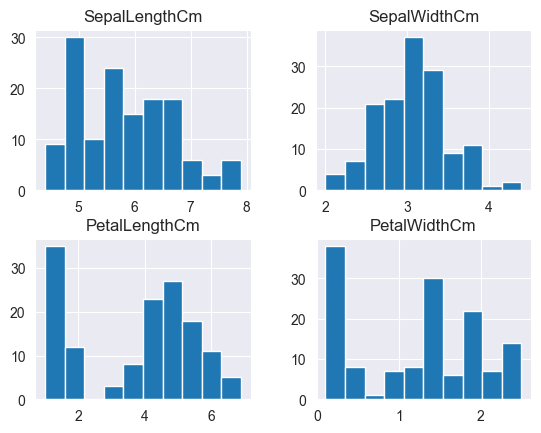

In [40]:
fgraph=df.select_dtypes('float')
fgraph.hist()

In [41]:


for i in [ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    df[i]=df[i].fillna(df[i].median())
df[i]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [42]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

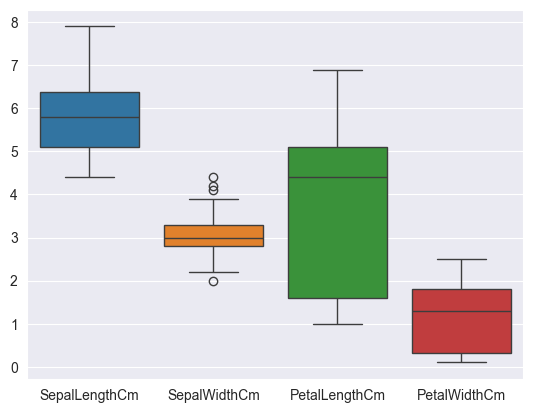

In [43]:
sns.boxplot(df)
plt.show

In [44]:
Q1=np.percentile(df['SepalWidthCm'], 25, method='midpoint')
Q2=np.percentile(df['SepalWidthCm'], 50, method='midpoint')
Q3=np.percentile(df['SepalWidthCm'], 75, method='midpoint')
print(Q1,Q2,Q3)

2.8 3.0 3.3


In [45]:
IQR=Q3-Q1
IQR

np.float64(0.5)

In [46]:
ulimit=Q3+1.5*IQR
llimit=Q1-1.5*IQR

print(ulimit, llimit)

4.05 2.05


In [47]:
outliers=[]
for x in df['SepalWidthCm']:
    if((x>ulimit)or (x<llimit)):
        outliers.append(x)
outliers

[4.4, 4.1, 4.2, 2.0]

In [48]:
df1=((df['SepalWidthCm']>ulimit) | (df['SepalWidthCm']<llimit))
df1

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: SepalWidthCm, Length: 150, dtype: bool

In [49]:
df.loc[df1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,4.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [50]:
remove=[15,32,33,60]
df.drop(remove, inplace=True)

In [51]:
outliers=[]
for x in df['SepalWidthCm']:
    if((x>ulimit)or (x<llimit)):
        outliers.append(x)
outliers

[]

In [52]:
df.reset_index(drop=True, inplace=True)

In [53]:
df.select_dtypes('object').nunique()

Species    3
dtype: int64

In [54]:
# encoding

df['Species']=le.fit_transform(df['Species'])


In [55]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,5.8,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,2
142,6.3,3.0,5.0,1.9,2
143,6.5,3.0,5.2,2.0,2
144,6.2,3.4,5.4,2.3,2


In [58]:
# scaling

x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,5.8,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
141,6.7,3.0,5.2,2.3
142,6.3,3.0,5.0,1.9
143,6.5,3.0,5.2,2.0
144,6.2,3.4,5.4,2.3


In [60]:
y=df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
141    2
142    2
143    2
144    2
145    2
Name: Species, Length: 146, dtype: int64

In [61]:
x1=minmax.fit_transform(x)

In [62]:
x2=pd.DataFrame(x1)

In [63]:
x3=pd.concat([x2,y], axis=1)

In [64]:
x3.describe()

,0,1,2,3,Species
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.414873,0.488719,0.481890,0.469178,1.020548
std,0.227144,0.224984,0.294322,0.306891,0.817643
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.352941,0.101695,0.125000,0.000000
50%,0.400000,0.470588,0.576271,0.500000,1.000000
75%,0.571429,0.588235,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000
